In [175]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [243]:
df=pd.read_csv('./insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


### Analysing given data

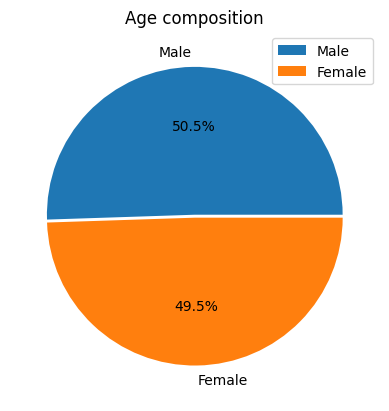

In [3]:
female=df.loc[df['sex']=='female'].count()[0]
male=df.loc[df['sex']=='male'].count()[0]
pieData=[male,female]
plt.pie(pieData,autopct='%1.1f%%',labels=['Male','Female'],explode=[0.01,0.01])
plt.title('Age composition')
plt.legend()
plt.show()

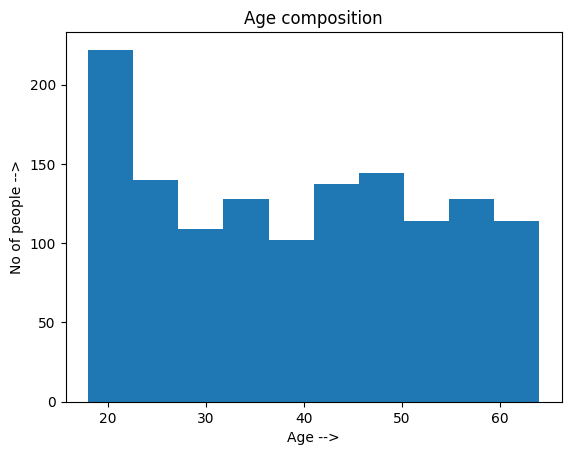

In [4]:
plt.hist(df['age'])
plt.xlabel('Age -->')
plt.ylabel('No of people -->')
plt.title('Age composition')
plt.show()

# Logistic Regression

In [226]:
df['smoker'] = (df['smoker']=='yes').astype(int)
df['smoker']


0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

#### Predicting if a customer is a smoker based on their age

In [227]:
X_train, X_test, y_train, y_test = train_test_split(df[["age"]], df["smoker"], test_size=0.2)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)

# Get the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.60%


## Predicting if a customer a smoker based on their BMI

In [128]:
X_train, X_test, y_train, y_test = train_test_split(df[["bmi"]], df["smoker"], test_size=0.2)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)

#Get the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.34%


# KNN Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier 

In [169]:
X_train, X_test, y_train, y_test = train_test_split(df[["bmi"]], df["smoker"], test_size=0.2)

knnmodel= KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_train,y_train)
y_pred=knnmodel.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       211
           1       0.16      0.05      0.08        57

    accuracy                           0.74       268
   macro avg       0.47      0.49      0.46       268
weighted avg       0.65      0.74      0.68       268



In [230]:
print(len(df[df['smoker']==0]))
print(len(df[df['smoker']==1]))

1064
274


In [232]:
from imblearn.over_sampling import RandomOverSampler

In [233]:
def scale_dataset(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values
    
    scaler=StandardScaler()
    X= scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X,Y= ros.fit_resample(X,Y)
    data=np.hstack=((X,np.reshape(Y,(-1,1))))
    
    return data,X,Y

In [238]:
df.sample

<bound method NDFrame.sample of       index  age     sex     bmi  children  smoker     region      charges
0         0   19  female  27.900         0       1  southwest  16884.92400
1         1   18    male  33.770         1       0  southeast   1725.55230
2         2   28    male  33.000         3       0  southeast   4449.46200
3         3   33    male  22.705         0       0  northwest  21984.47061
4         4   32    male  28.880         0       0  northwest   3866.85520
...     ...  ...     ...     ...       ...     ...        ...          ...
1333   1333   50    male  30.970         3       0  northwest  10600.54830
1334   1334   18  female  31.920         0       0  northeast   2205.98080
1335   1335   18  female  36.850         0       0  southeast   1629.83350
1336   1336   21  female  25.800         0       0  southwest   2007.94500
1337   1337   61  female  29.070         0       1  northwest  29141.36030

[1338 rows x 8 columns]>

In [245]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [246]:
train, X_train,y_train= scale_dataset(train,oversample=True)

ValueError: could not convert string to float: 'male'